In [277]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Загрузка и предварительный анализ данных 

In [278]:
# загрузим необходимые датасеты

courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-glazunov-23/first_project/courses.csv')
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-glazunov-23/first_project/assessments.csv')
student_assessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-glazunov-23/first_project/studentAssessment.csv')
student_registration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-glazunov-23/first_project/studentRegistration.csv')



In [279]:
assessments.head(2)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0


Первые два столбца имеют путающие название, переименуем их для того, чтобы было удобнее работать в дальнейшем

In [280]:
assessments = assessments.rename(columns={'code_presentation': 'module',
                                          'code_module': 'subject'})

assessments.head(2)

,subject,module,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0


Проверим типы данных, форму таблицы и отсутсвующие значения

In [281]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          206 non-null    object 
 1   module           206 non-null    object 
 2   id_assessment    206 non-null    int64  
 3   assessment_type  206 non-null    object 
 4   date             195 non-null    float64
 5   weight           206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Посмотрим на следующий датафрейм

In [282]:
courses.head(2)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269


Первые два столбца имеют путающие название, переименуем их для того, чтобы было удобнее работать в дальнейшем

In [283]:
courses = courses.rename(columns={'code_presentation': 'module',
                                  'code_module': 'subject'})

courses.head(2)

,subject,module,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269


Проверим типы данных, форму таблицы и отсутсвующие значения

In [284]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   subject                     22 non-null     object
 1   module                      22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Посмотрим на следующий датафрейм

In [285]:
student_assessment.head(2)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0


Проверим типы данных, форму таблицы и отсутсвующие значения

In [286]:
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Посмотрим на следующий датафрейм

In [287]:
student_registration.head(2)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN


Первые два столбца имеют путающие название, переименуем их для того, чтобы было удобнее работать в дальнейшем

In [288]:
student_registration = student_registration.rename(columns={'code_presentation': 'module',
                                                            'code_module': 'subject'})

student_registration.head(2)

,subject,module,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN


Проверим типы данных, форму таблицы и отсутсвующие значения

In [289]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              32593 non-null  object 
 1   module               32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


## Task 1
Сколько студентов успешно сдали только один курс?

Необходимые данные хранятся в двух датасетах: student_assessment и assessments.
Для того, чтобы найти тех, кто успешно садл только один курс, необходимо:
- Объединить оба датафрейма
- Отобрать только экзамены, которые были сданы (набрали от 40 баллов)
- Выбрать тех студентов у которых насчитывается ровно 1 сданный курс

In [290]:
students_with_one_exam = len(student_assessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                                               .query('assessment_type == "Exam" & score >= 40') \
                                               .id_student \
                                               .value_counts().loc[lambda x : x == 1])
print('-' * 10)
print(f'\n{students_with_one_exam} студента сдали ровно один курс\n')
print('-' * 10)

----------

3802 студента сдали ровно один курс

----------


## Task 2

Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью

In [291]:
# Соединим две таблицы по id_assessment
# Оставим только экзамены
# Переименуем колонки для лучшего восприятия
# Отберем необходимые для дальнейшей работы колонки
subject_score_df = student_assessment \
    .merge(assessments, how = 'inner', on = 'id_assessment') \
    .query('assessment_type == "Exam"')[['module',
                                         'subject',
                                         'id_assessment', 
                                         'id_student',
                                         'date_submitted',
                                         'score']]

# Добавим столбец с информацией о том был ли сдан экзамен или нет Сдан - 1, Не сдан - 0
subject_score_df['is_passed'] = subject_score_df.score.apply(lambda x: 1 if x >= 40 else 0)

# Выведем итоговый датафрейм
subject_score_df.head()

,module,subject,id_assessment,id_student,date_submitted,score,is_passed
52923,2014B,CCC,24290,558914,230,32.0,0
52924,2014B,CCC,24290,559706,234,78.0,1
52925,2014B,CCC,24290,559770,230,54.0,1
52926,2014B,CCC,24290,560114,230,64.0,1
52927,2014B,CCC,24290,560311,234,100.0,1


In [292]:
# Сгруппируем данные по экзамену и предмету. Посчитаем сколько было попыток сдать экзамен и сколько из них было успешных
subject_success_list = subject_score_df.groupby(['id_assessment', 'subject'], as_index = False) \
    .agg({'score': 'count', 'is_passed': 'sum'}) \
    .rename(columns = {'score': 'total'})

# Посчитаем завершаемость курса как отношение успешных попыток ко всем
subject_success_list['success_ratio'] = round(100 * subject_success_list.is_passed / subject_success_list.total, 2)

# Отсортируем полученные значения и выведем полученную таблицу
subject_success_list = subject_success_list.sort_values('success_ratio')
subject_success_list

,id_assessment,subject,total,is_passed,success_ratio
2,25340,DDD,602,504,83.72
1,24299,CCC,1168,1019,87.24
5,25368,DDD,950,842,88.63
0,24290,CCC,747,664,88.89
3,25354,DDD,968,878,90.70
4,25361,DDD,524,485,92.56


In [293]:
# Выведем самый тяжелый и самый простой для сдачи экзамен
print('The hardest exam:\n')
print(subject_success_list.query('success_ratio == success_ratio.max()').iloc[0,[0,1,4]])

print('\nThe easiest exam:\n')
print(subject_success_list.query('success_ratio == success_ratio.min()').iloc[0,[0,1,4]])

The hardest exam:

id_assessment    25361
subject            DDD
success_ratio    92.56
Name: 4, dtype: object

The easiest exam:

id_assessment    25340
subject            DDD
success_ratio    83.72
Name: 2, dtype: object


## Task 3 

По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [294]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


В date_submitted присутствуют отрицательные значения

In [295]:
student_assessment.query('date_submitted < 0').head()

,id_assessment,id_student,date_submitted,is_banked,score
1641,1758,603861,-1,1,61.0
1685,1758,1970390,-1,1,78.0
1690,1758,2073016,-1,1,60.0
1693,1758,2139353,-1,1,65.0
1708,1758,2358969,-1,1,68.0


Большинство этих значений равно -1 и значится для тех студентов, кому курсы были перезачтены, но также мы можем увидеть небольшое количество значений у тех, кому курсы не были перезачтены

In [296]:
student_assessment.query('date_submitted < 0').is_banked.value_counts()

1    1909
0     148
Name: is_banked, dtype: int64

На наш взгляд правильно убрать эти значения вместе с теми, которые были перезачтены, так как это выглядит как ошибочно внесенные данные. Более того, этих значений немного относительно всего объема данных в датафрейме - 173912 строк

In [297]:
# Отфильтровываем необходимые значения
student_assessment_refined = student_assessment.query('date_submitted >= 0 & score >= 40')
student_assessment_refined.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [298]:
# Считаем среднее по всем экзаменам
assessment_mean_score = student_assessment_refined \
    .groupby('id_assessment', as_index = False) \
    .agg({'date_submitted': 'mean'}).round(2) \
    .rename(columns = {'date_submitted': 'mean_date_assessment'})

assessment_mean_score.head()

,id_assessment,mean_date_assessment
0,1752,19.30
1,1753,55.61
2,1754,117.24
3,1755,167.15
4,1756,214.57


In [299]:
# Получим средние значения времени сдачи экзаменов по предметам
assessment_mean_score \
    .merge(assessments, on = 'id_assessment') \
    .query('assessment_type == "Exam"') \
    .groupby('subject') \
    .agg({'mean_date_assessment': 'mean'})

,mean_date_assessment
subject,
CCC,237.9900
DDD,236.8525


## Task 4 

Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)

In [300]:
# Для решения этого задания нам необходим датасет student_registration
student_registration.head()

,subject,module,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [301]:
# Сгруппируем датасет по курсу и посчитаем всех зарегистрировавшихся и всех отписавшихся от курса
modules_regs_stats = student_registration \
    .groupby('subject', as_index = False) \
    .agg({'date_registration': 'count', 'date_unregistration': 'count'}) \
    .rename(columns={'date_registration': 'total_reg', 'date_unregistration': 'total_left'})

# Посчитаем отток студентов как отношение всех покинувших курс к тем, кто на курс зарегистрировался
modules_regs_stats['churn_rate'] = np.round(100 * modules_regs_stats.total_left / modules_regs_stats.total_reg, 2)

modules_regs_stats

,subject,total_reg,total_left,churn_rate
0,AAA,748,126,16.84
1,BBB,7900,2377,30.09
2,CCC,4426,1947,43.99
3,DDD,6257,2235,35.72
4,EEE,2932,718,24.49
5,FFF,7751,2380,30.71
6,GGG,2534,289,11.40


In [302]:
# Отсортируем значения по общему количеству регистраций и выберем ТОП-3
modules_regs_stats.sort_values('total_reg', ascending = False).iloc[0:3,0:2]

,subject,total_reg
1,BBB,7900
5,FFF,7751
3,DDD,6257


In [303]:
# Отсортируем значения по оттоку и выберем ТОП-3
modules_regs_stats.sort_values('churn_rate', ascending = False).iloc[0:3,[0, 3]]

,subject,churn_rate
2,CCC,43.99
3,DDD,35.72
5,FFF,30.71


## Task 5

Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

In [304]:
# Возьмем датасет, который мы получили ранее
subject_score_df.head()

,module,subject,id_assessment,id_student,date_submitted,score,is_passed
52923,2014B,CCC,24290,558914,230,32.0,0
52924,2014B,CCC,24290,559706,234,78.0,1
52925,2014B,CCC,24290,559770,230,54.0,1
52926,2014B,CCC,24290,560114,230,64.0,1
52927,2014B,CCC,24290,560311,234,100.0,1


In [305]:
# Сгруппируем данные по семестру, посчитаем количество попыток сдачи экзамена и успешные попытки
completion_by_semester = subject_score_df \
    .groupby('module', as_index = False) \
    .agg({'score': 'count', 'is_passed': 'sum'}) \
    .rename(columns={'score': 'total'})

# Рассчитаем процент завершаемости курсов
completion_by_semester['completion'] = 100 * completion_by_semester.is_passed / completion_by_semester.total

completion_by_semester.head()

,module,total,is_passed,completion
0,2013B,602,504,83.720930
1,2013J,968,878,90.702479
2,2014B,1271,1149,90.401259
3,2014J,2118,1861,87.865911


In [306]:
# Выберем семестр с самой низкой завершаемостью
completion_by_semester.sort_values('completion').head(1)

,module,total,is_passed,completion
0,2013B,602,504,83.72093


In [307]:
# Выберем семестр с самым долгим сроком сдачи экзамена
subject_score_df \
    .groupby('module', as_index = False) \
    .agg({'date_submitted': 'mean'}) \
    .sort_values('date_submitted').tail(1)

,module,date_submitted
3,2014J,243.674221


## Task 6

Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.
В адаптированной кластеризации можешь выбрать следующие метрики:
- R - среднее время сдачи одного экзамена
- F - завершаемость курсов
- M - среднее количество баллов, получаемое за экзамен

Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов. Описание подхода можно найти тут. 

In [308]:
# Возьмем датасет, который мы получили ранее
subject_score_df.head()

,module,subject,id_assessment,id_student,date_submitted,score,is_passed
52923,2014B,CCC,24290,558914,230,32.0,0
52924,2014B,CCC,24290,559706,234,78.0,1
52925,2014B,CCC,24290,559770,230,54.0,1
52926,2014B,CCC,24290,560114,230,64.0,1
52927,2014B,CCC,24290,560311,234,100.0,1


In [309]:
rfm_df = subject_score_df.groupby('id_student', as_index=False) \
                         .agg({'date_submitted': 'mean', 'is_passed': 'mean', 'score': 'mean'}) \
                         .rename(columns={'date_submitted': 'recency',
                                          'is_passed': 'frequency',
                                          'score': 'monetary'})

rfm_df.head()

,id_student,recency,frequency,monetary
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


Для разбивки по кластерам, нам необходимо выделить три группы. Для начала посмотрим на распределение всех трех переменных

[Text(0.5, 1.0, 'Monetary distribution\n')]

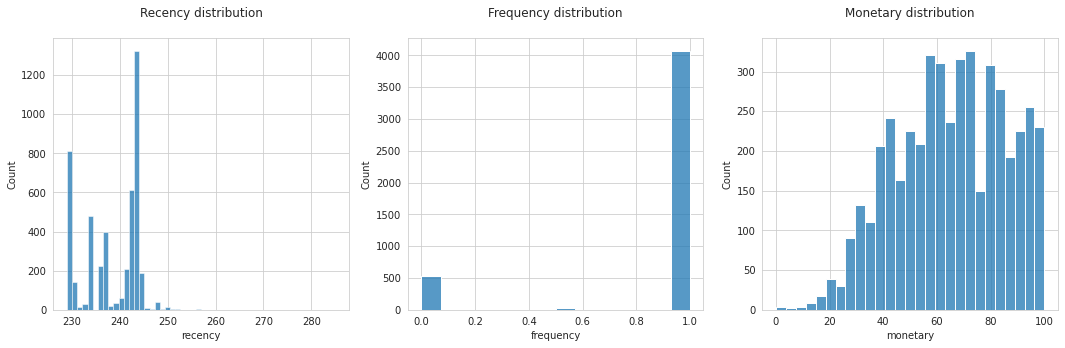

In [310]:
# Визуализируем распределение полученных значений на гистограмме
figure, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set_style("whitegrid")

sns.histplot(rfm_df.recency, ax=axes[0]).set(title='Recency distribution\n')
sns.histplot(rfm_df.frequency, ax=axes[1]).set(title='Frequency distribution\n')
sns.histplot(rfm_df.monetary, ax=axes[2]).set(title='Monetary distribution\n')

Так как нам необходимо разделить результаты на три группы, для каждого набор значений нам необходимо выделить 0.333 и 0.666 квантили. Таким образом будут выделены 3 группы.

Для этого напишем функцию, которая будет распределять значения по каждой группе в зависимости от того, в каком квантиле находится значение, при этом для recency и monetary необзходимо две разные функции, так как большое значение в monetary - означает более хороший результат, а в recency наоборот.

Для параметра frequency логичнее будет определить группы исходя из имеющихся трех значений:
- 1 - 3
- 0.5 - 2
- 0 - 1

In [311]:
def rfm_transition_mon(data, column_name, q1 = 0.333, q2 = 0.666):
    # Создадим новую колонку, в зависимости от значений исходной колонки
    new_column = data[column_name].apply(lambda x: 3 if x > data[column_name].quantile(q2)
                                        else 2 if x > data[column_name].quantile(q1)
                                        else 1)
    
    # Добавим новую колонку к исходному датасету
    data[f'rfm_{column_name}'] = new_column

def rfm_transition_rec(data, column_name, q1 = 0.333, q2 = 0.666):
    # Создадим новую колонку, в зависимости от значений исходной колонки
    new_column = data[column_name].apply(lambda x: 1 if x > data[column_name].quantile(q2)
                                        else 2 if x > data[column_name].quantile(q1)
                                        else 3)
    
    # Добавим новую колонку к исходному датасету
    data[f'rfm_{column_name}'] = new_column
    
def rfm_transition_freq(data, column_name):
    new_column = data[column_name].apply(lambda x: 3 if x == 1 else 2 if x == 0.5 else 1)
    
    # Добавим новую колонку к исходному датасету
    data[f'rfm_{column_name}'] = new_column

In [312]:
# Используем функцию, чтобы создать три новых столбца для длаьнейшего RFM анализа
rfm_transition_rec(rfm_df, "recency")
rfm_transition_freq(rfm_df, "frequency")
rfm_transition_mon(rfm_df, "monetary")

# датасет после использования функции
rfm_df.head()

,id_student,recency,frequency,monetary,rfm_recency,rfm_frequency,rfm_monetary
0,23698,243.0,1.0,80.0,2,3,3
1,24213,236.0,1.0,58.0,3,3,2
2,27116,243.0,1.0,96.0,2,3,3
3,28046,237.0,1.0,40.0,2,3,1
4,28787,243.0,1.0,44.0,2,3,1


Получаем три новые "RFM-переменные", теперь необходимо объединить их в один столбец, чтобы получить необходимые кластеры

In [313]:
rfm_df['rfm_cluster'] = rfm_df.iloc[:,4].astype(str) + rfm_df.iloc[:,5].astype(str) + rfm_df.iloc[:,6].astype(str)

rfm_df.head()

,id_student,recency,frequency,monetary,rfm_recency,rfm_frequency,rfm_monetary,rfm_cluster
0,23698,243.0,1.0,80.0,2,3,3,233
1,24213,236.0,1.0,58.0,3,3,2,332
2,27116,243.0,1.0,96.0,2,3,3,233
3,28046,237.0,1.0,40.0,2,3,1,231
4,28787,243.0,1.0,44.0,2,3,1,231


In [314]:
# Посчитаем количество получившихся кластеров

rfm_df.rfm_cluster.nunique()

16

Займемся интерпретацией и анализом получившихся кластеров.
Стоит отметить, что кластеризация была составлена тким образом, что кластер со всеми 333 указывает на лучших студентов (сдали все экзамены, получили самые большие баллы, и сделали это как можно быстрее). 111 указывает на самых отстающих.

Для начала посчитаем количество студентов в каждом кластере и определим ТОП-3 самых крупных кластеров и ТОП-3 самых немногочисленных

In [315]:
print('Самые крупные кластеры')
print(rfm_df.rfm_cluster.value_counts().head(3))
print('\nСамые немногочисленные кластеры')
print(rfm_df.rfm_cluster.value_counts().tail(3))

Самые крупные кластеры
232    693
233    586
333    546
Name: rfm_cluster, dtype: int64

Самые немногочисленные кластеры
321    9
121    1
322    1
Name: rfm_cluster, dtype: int64


Давайте посмотрим на описательные статистики самых крупных кластеров

In [316]:
rfm_df.query('rfm_cluster == ["233", "232", "333"]') \
    .groupby('rfm_cluster', as_index=False) \
    .agg({'recency': ['mean', 'median', 'max', 'min'],
          'monetary': ['mean', 'median', 'max', 'min']})

rfm_cluster     recency                        monetary                    
                     mean median    max    min       mean median    max   min
0         232  240.954545  242.0  243.0  237.0  66.415584   67.0   76.0  56.5
1         233  241.289249  242.0  243.0  237.0  86.691126   87.0  100.0  76.5
2         333  232.261905  232.5  236.0  229.0  88.271978   87.0  100.0  76.5